<a href="https://colab.research.google.com/github/shanikairoshi/Deep-Unfolded_QML/blob/main/Bloch_Sphere_Analysis_for_Convergence_proof_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

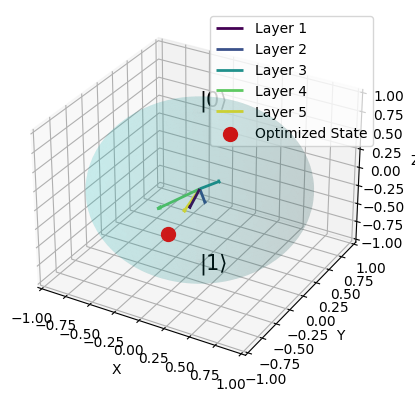

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to plot a Bloch sphere
def plot_bloch_sphere():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the Bloch sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='c', alpha=0.1)

    # Add the poles |0> and |1>
    ax.text(0, 0, 1.1, r'|0⟩', fontsize=15)
    ax.text(0, 0, -1.1, r'|1⟩', fontsize=15)

    # Adjust axes
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    return fig, ax

# Function to plot deep unfolding steps
def plot_deep_unfolding(ax, layers=5):
    # Initial state on the Bloch sphere (near the top |0>)
    state = np.array([0, 0, 1])

    # Colors for each layer
    colors = plt.cm.viridis(np.linspace(0, 1, layers))

    # Stepwise optimization across layers
    for i in range(layers):
        # Generate random movement on the sphere for each layer (simplified)
        theta = np.pi * np.random.rand()  # random polar angle
        phi = 2 * np.pi * np.random.rand()  # random azimuthal angle
        new_state = np.array([
            np.sin(theta) * np.cos(phi),
            np.sin(theta) * np.sin(phi),
            np.cos(theta)
        ])

        # Plot the vector (arrow) for this layer
        ax.quiver(0, 0, 0, new_state[0], new_state[1], new_state[2], color=colors[i], length=0.5, arrow_length_ratio=0.1, linewidth=2, label=f'Layer {i+1}')

        # Update the state
        state = new_state

    # Plot final state with distinct marker
    ax.scatter(state[0], state[1], state[2], color='red', s=100, label='Optimized State')

# Generate the plot
fig, ax = plot_bloch_sphere()
plot_deep_unfolding(ax, layers=5)
ax.legend(loc='best')
plt.show()


In [ ]:
!pip install qiskit;
!pip install qiskit-machine-learning
!pip install qiskit qiskit_machine_learning qiskit_algorithms
!pip install qiskit-aer

from IPython.display import clear_output
clear_output()


In [ ]:
!pip install qiskit[visualization] --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=b18cbc9d2874df1114715a34e4bb6d1ebd614b1e4f3d2efcde3d0b0924e514fb
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


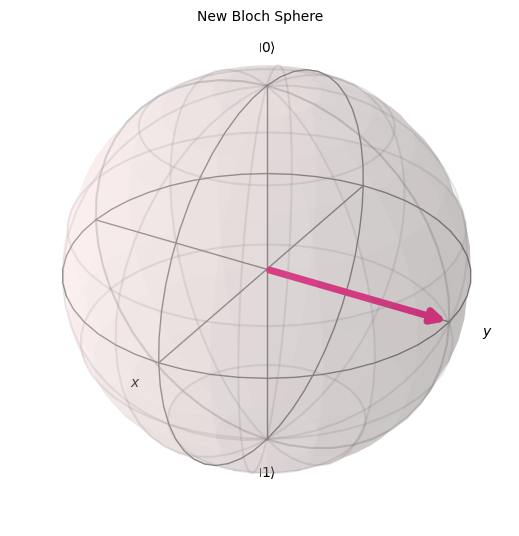

In [ ]:
from qiskit.visualization import plot_bloch_vector

plot_bloch_vector([0,1,0], title="New Bloch Sphere")

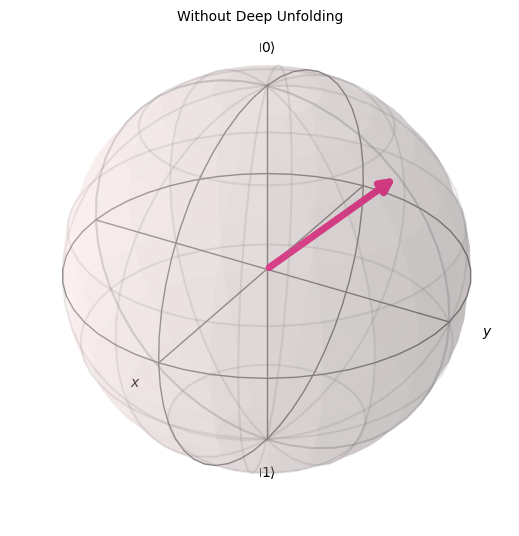

In [ ]:
from qiskit.visualization import plot_bloch_vector
import numpy as np

# Plot without deep unfolding (single step optimization)
# Final optimized state
theta = np.pi / 4  # Example final state angle
phi = np.pi / 2    # Example final state angle

final_state = [
    np.sin(theta) * np.cos(phi),  # x
    np.sin(theta) * np.sin(phi),  # y
    np.cos(theta)                # z
]

# Plot the final state on Bloch sphere
plot_bloch_vector(final_state, title="Without Deep Unfolding")



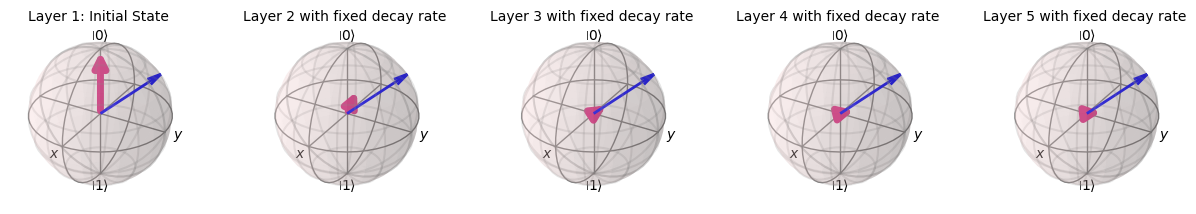

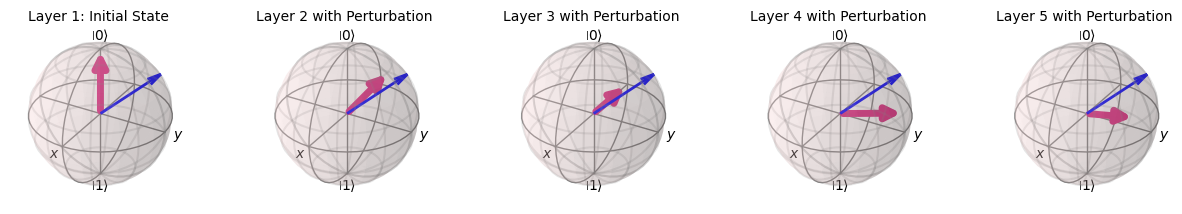

In [60]:
from qiskit.visualization import plot_bloch_vector
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the global target (optimal point) on the Bloch sphere
def plot_target_point(ax, global_optimum):
    # Global target state (optimal state) in Cartesian coordinates
    ax.quiver(0, 0, 0, global_optimum[0], global_optimum[1], global_optimum[2], color='b', lw=2, arrow_length_ratio=0.2)
    return global_optimum

# Function to plot multiple optimization steps (with deep unfolding)
def plot_adaptive_unfolding(global_optimum, layers=5):
    fig, axes = plt.subplots(1, layers, figsize=(15, 5), subplot_kw={'projection': '3d'})

    initial_state = [0, 0, 1]  # Start from the |0⟩ state
    plot_bloch_vector(initial_state, ax=axes[0], title=f"Layer 1: Initial State")
    plot_target_point(axes[0], global_optimum)

    for i in range(1, layers):
        # Use a non-linear step size function (e.g., exponential decay for smaller steps at later layers)
        step_size = (1 - np.exp(-i)) / (1 - np.exp(-layers))
        state = [
            initial_state[j] + (global_optimum[j] - initial_state[j]) * step_size
            for j in range(3)
        ]
        plot_bloch_vector(state, ax=axes[i], title=f"Layer {i+1} with fixed decay rate")
        plot_target_point(axes[i], global_optimum)

    plt.subplots_adjust(wspace=0.4)
    plt.savefig('withdixeddecayBS.png', dpi=300)
    plt.show()

# Function to plot multiple optimization steps with perturbations (adding noise)
def plot_with_perturbations(global_optimum, layers=5, noise_level=0.1):
    fig, axes = plt.subplots(1, layers, figsize=(15, 5), subplot_kw={'projection': '3d'})

    initial_state = [0, 0, 1]  # Start from the |0⟩ state
    plot_bloch_vector(initial_state, ax=axes[0], title=f"Layer 1: Initial State")
    plot_target_point(axes[0], global_optimum)

    for i in range(1, layers):
        # Interpolate between initial state and global optimum
        step_size = i / layers
        state = [
            initial_state[j] + (global_optimum[j] - initial_state[j]) * step_size
            for j in range(3)
        ]

        # Add noise to the state to simulate perturbations
        state = [state[j] + np.random.uniform(-noise_level, noise_level) for j in range(3)]

        # Normalize the state vector to ensure it stays on the Bloch sphere
        state_norm = np.linalg.norm(state)
        state = [s / state_norm for s in state]

        plot_bloch_vector(state, ax=axes[i], title=f"Layer {i+1} with Perturbation")
        plot_target_point(axes[i], global_optimum)

    plt.subplots_adjust(wspace=0.4)
    plt.savefig('withpertBS.png', dpi=300)
    plt.show()

# Define the global optimum (you can adjust theta and phi for different target points)
theta_global = np.pi / 3
phi_global = np.pi / 4

# Global optimum coordinates
global_optimum = [np.sin(theta_global) * np.cos(phi_global),
                  np.sin(theta_global) * np.sin(phi_global),
                  np.cos(theta_global)]

# Plot with adaptive unfolding (increased complexity, gradual optimization)
plot_adaptive_unfolding(global_optimum, layers=5)  # Increase layers for more gradual evolution

# Plot with perturbations (showing added noise to the optimization process)
plot_with_perturbations(global_optimum, layers=5, noise_level=0.5)  # Adjust noise level as needed


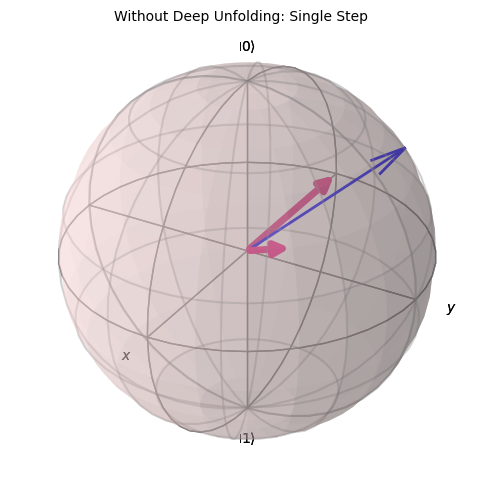

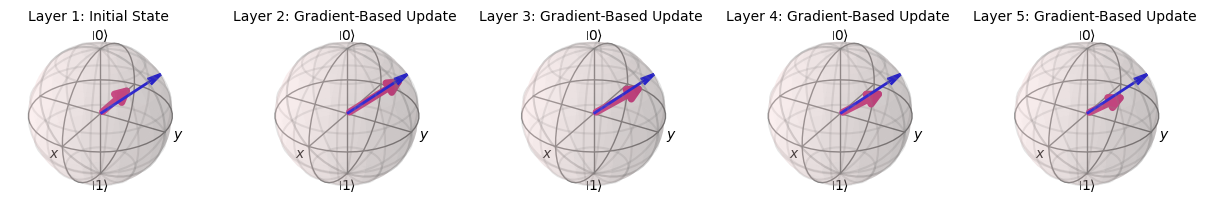

In [66]:
from qiskit.visualization import plot_bloch_vector
import numpy as np
import matplotlib.pyplot as plt


# Function to plot the global target (optimal point) on the Bloch sphere
def plot_target_point(ax, global_optimum):
    # Global target state (optimal state) in Cartesian coordinates
    ax.quiver(0, 0, 0, global_optimum[0], global_optimum[1], global_optimum[2],
              color='b', lw=2, arrow_length_ratio=0.2)
    return global_optimum




# Function to simulate gradient-based optimization steps
def plot_gradient_based_unfolding(global_optimum, layers=5, learning_rate=1.0):
    fig, axes = plt.subplots(1, layers, figsize=(15, 5), subplot_kw={'projection': '3d'})

    # Start from a state farther from the global optimum (for more noticeable differences)
    initial_state = [-1, 0, 0]  # A point on the opposite side of the Bloch sphere
    plot_bloch_vector(initial_state, ax=axes[0], title=f"Layer 1: Initial State")
    plot_target_point(axes[0], global_optimum)


    current_state = initial_state
    for i in range(1, layers):
        # Calculate the gradient (difference between current state and global optimum)
        gradient = [
            global_optimum[j] - current_state[j]
            for j in range(3)
        ]

        # Adjust the step size based on the gradient and learning rate
        step_size = learning_rate / (i + 1)  # Simulating convergence with decreasing learning rate

        # Update the state based on the gradient
        next_state = [
            current_state[j] + step_size * gradient[j]
            for j in range(3)
        ]

        # Normalize the state vector to ensure it stays on the Bloch sphere
        state_norm = np.linalg.norm(next_state)
        current_state = [s / state_norm for s in next_state]

        # Plot the updated state
        plot_bloch_vector(current_state, ax=axes[i], title=f"Layer {i+1}: Gradient-Based Update")
        plot_target_point(axes[i], global_optimum)

    plt.subplots_adjust(wspace=0.4)
    plt.savefig('withDUGradientBS.png', dpi=300)
    plt.show()

# Function to plot optimization without deep unfolding (single step)
def plot_without_deep_unfolding(global_optimum):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6), subplot_kw={'projection': '3d'})

    initial_state = [-1, 0, 0]  # Farther initial state for comparison
    plot_bloch_vector(initial_state, ax=ax, title="Without Deep Unfolding: Single Step")
    plot_target_point(ax, global_optimum)


    # Final step (directly to the global optimum)
    plot_bloch_vector(global_optimum, ax=ax, title="Without Deep Unfolding: Single Step")
    plt.savefig('withoutDUBS.png', dpi=300)
    plt.show()

# Define the global optimum (you can adjust theta and phi for different target points)
theta_global = np.pi / 3
phi_global = np.pi / 4

# Global optimum coordinates
global_optimum = [np.sin(theta_global) * np.cos(phi_global),
                  np.sin(theta_global) * np.sin(phi_global),
                  np.cos(theta_global)]

# Plot optimization without deep unfolding (direct step to the target)
plot_without_deep_unfolding(global_optimum)

# Plot gradient-based unfolding (gradual optimization with larger learning rate and fewer layers)
plot_gradient_based_unfolding(global_optimum, layers=5, learning_rate=1.0)


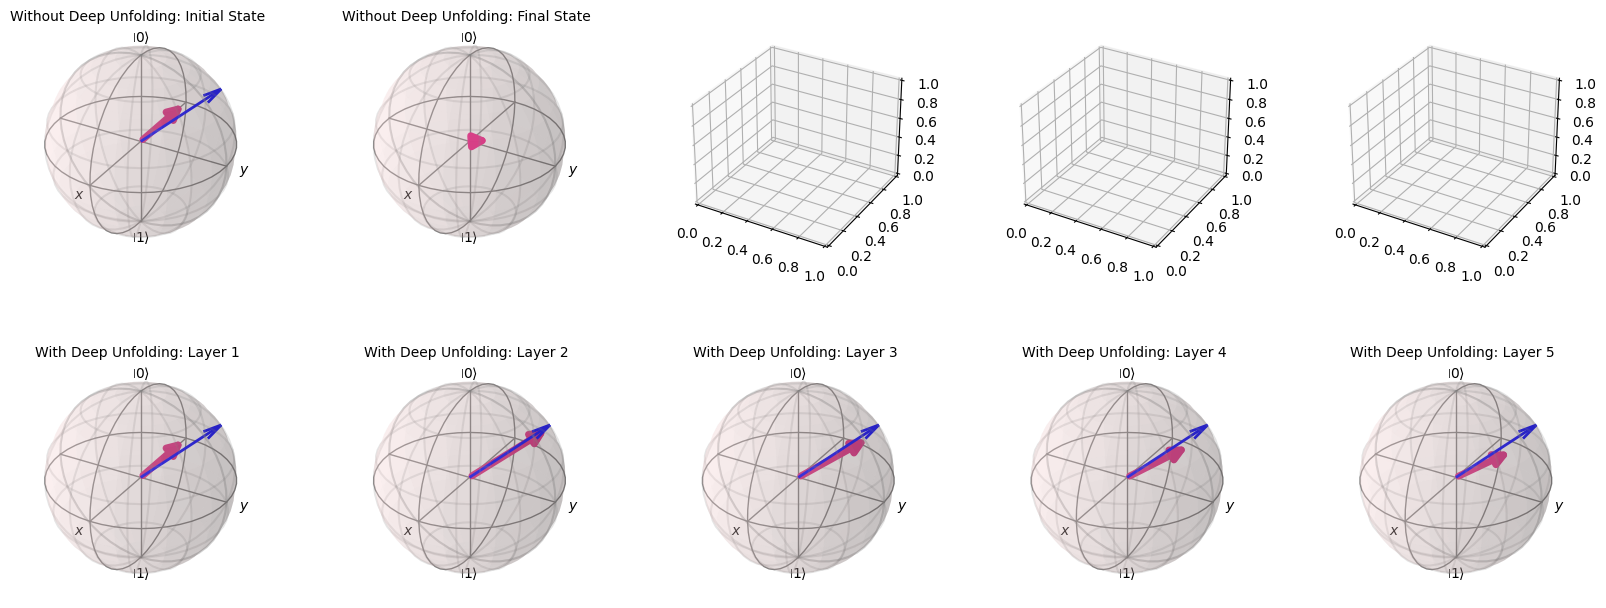

In [64]:
from qiskit.visualization import plot_bloch_vector
import numpy as np
import matplotlib.pyplot as plt


# Function to plot the global target (optimal point) on the Bloch sphere
def plot_target_point(ax, global_optimum):
    # Global target state (optimal state) in Cartesian coordinates
    ax.quiver(0, 0, 0, global_optimum[0], global_optimum[1], global_optimum[2],
              color='b', lw=2, arrow_length_ratio=0.2)
    return global_optimum

# Function to simulate gradient-based optimization steps
def plot_gradient_based_unfolding(global_optimum, layers=5, learning_rate=1.0):
    fig, axes = plt.subplots(1, layers, figsize=(20, 4), subplot_kw={'projection': '3d'})

    # Start from a state farther from the global optimum (for more noticeable differences)
    initial_state = [-1, 0, 0]  # A point on the opposite side of the Bloch sphere
    plot_bloch_vector(initial_state, ax=axes[0], title=f"Layer 1: Initial State")
    plot_target_point(axes[0], global_optimum)

    current_state = initial_state
    for i in range(1, layers):
        # Calculate the gradient (difference between current state and global optimum)
        gradient = [
            global_optimum[j] - current_state[j]
            for j in range(3)
        ]

        # Adjust the step size based on the gradient and learning rate
        step_size = learning_rate / (i + 1)  # Simulating convergence with decreasing learning rate

        # Update the state based on the gradient
        next_state = [
            current_state[j] + step_size * gradient[j]
            for j in range(3)
        ]

        # Normalize the state vector to ensure it stays on the Bloch sphere
        state_norm = np.linalg.norm(next_state)
        current_state = [s / state_norm for s in next_state]

        # Plot the updated state
        plot_bloch_vector(current_state, ax=axes[i], title=f"Layer {i+1}: Gradient-Based Update")
        plot_target_point(axes[i], global_optimum)

    plt.subplots_adjust(wspace=0.4)
    plt.show()

# Function to plot optimization without deep unfolding (single step)
def plot_without_deep_unfolding(global_optimum):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6), subplot_kw={'projection': '3d'})

    initial_state = [-1, 0, 0]  # Farther initial state for comparison
    plot_bloch_vector(initial_state, ax=ax, title="Without Deep Unfolding: Single Step")
    plot_target_point(ax, global_optimum)

    # Final step (directly to the global optimum)
    plot_bloch_vector(global_optimum, ax=ax, title="Without Deep Unfolding: Single Step")
    plt.savefig('withoutDUBS1.png', dpi=300)
    plt.show()

# Function to combine both visualizations in one plot for comparison
def plot_combined_visualizations(global_optimum, layers=5, learning_rate=1.0):
    fig, axes = plt.subplots(2, layers, figsize=(20, 8), subplot_kw={'projection': '3d'})

    # Without deep unfolding (direct step to the global optimum)
    initial_state = [-1, 0, 0]  # Farther initial state for comparison
    plot_bloch_vector(initial_state, ax=axes[0, 0], title="Without Deep Unfolding: Initial State")
    plot_target_point(axes[0, 0], global_optimum)
    plot_bloch_vector(global_optimum, ax=axes[0, 1], title="Without Deep Unfolding: Final State")

    # Gradient-based unfolding (with gradual optimization)
    plot_bloch_vector(initial_state, ax=axes[1, 0], title=f"With Deep Unfolding: Layer 1")
    plot_target_point(axes[1, 0], global_optimum)

    current_state = initial_state
    for i in range(1, layers):
        # Calculate the gradient (difference between current state and global optimum)
        gradient = [
            global_optimum[j] - current_state[j]
            for j in range(3)
        ]

        # Adjust the step size based on the gradient and learning rate
        step_size = learning_rate / (i + 1)  # Simulating convergence with decreasing learning rate

        # Update the state based on the gradient
        next_state = [
            current_state[j] + step_size * gradient[j]
            for j in range(3)
        ]

        # Normalize the state vector to ensure it stays on the Bloch sphere
        state_norm = np.linalg.norm(next_state)
        current_state = [s / state_norm for s in next_state]

        # Plot the updated state for gradient-based unfolding
        plot_bloch_vector(current_state, ax=axes[1, i], title=f"With Deep Unfolding: Layer {i+1}")
        plot_target_point(axes[1, i], global_optimum)

    plt.subplots_adjust(wspace=0.4)
    plt.savefig('withoutDUBS1.png', dpi=300)
    plt.show()

# Define the global optimum (you can adjust theta and phi for different target points)
theta_global = np.pi / 3
phi_global = np.pi / 4

# Global optimum coordinates
global_optimum = [np.sin(theta_global) * np.cos(phi_global),
                  np.sin(theta_global) * np.sin(phi_global),
                  np.cos(theta_global)]

# Plot combined visualizations
plot_combined_visualizations(global_optimum, layers=5, learning_rate=1.0)


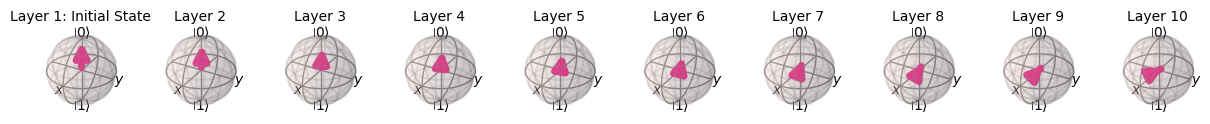

In [ ]:
from qiskit.visualization import plot_bloch_vector
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the global target (optimal point) on the Bloch sphere
def plot_target_point(ax, theta=np.pi/3, phi=np.pi/4):
    # Global target state (optimal state) in Cartesian coordinates
    global_optimum = [
        np.sin(theta) * np.cos(phi),  # x
        np.sin(theta) * np.sin(phi),  # y
        np.cos(theta)                # z
    ]

    # Plot the target point on the Bloch sphere
    plot_bloch_vector(global_optimum, ax=ax, title="Global Optimum")
    return global_optimum

# Function to plot multiple optimization steps (with deep unfolding)
def plot_deep_unfolding_steps(global_optimum, layers=10):
    fig, axes = plt.subplots(1, layers, figsize=(15, 5), subplot_kw={'projection': '3d'})

    initial_state = [0, 0, 1]  # Start from the |0⟩ state
    plot_bloch_vector(initial_state, ax=axes[0], title=f"Layer 1: Initial State")  # Plot the initial state

    # Generate intermediate steps that gradually approach the global optimum
    for i in range(1, layers):
        # Interpolate between the initial state and the global optimum
        state = [
            initial_state[j] + (global_optimum[j] - initial_state[j]) * (i / layers)
            for j in range(3)
        ]

        # Plot each state as an individual Bloch vector in the subplot
        plot_bloch_vector(state, ax=axes[i], title=f"Layer {i+1}")

    plt.subplots_adjust(wspace=0.4)  # Adjust the space between subplots
    plt.show()

# Define the global optimum (you can adjust theta and phi for different target points)
theta_global = np.pi / 3
phi_global = np.pi / 4

# Plot the deep unfolding process with separate diagrams for each layer (with 10 layers to show expressivity)
global_optimum = [np.sin(theta_global) * np.cos(phi_global),
                  np.sin(theta_global) * np.sin(phi_global),
                  np.cos(theta_global)]

plot_deep_unfolding_steps(global_optimum, layers=10)  # Show 10 layers of unfolding to highlight expressivity
